Iremos usar a base de dados de vinhos verdes portugueses (nas variantes branco e tinto) que encontra-se disponível no Kaggle:

Para as questões 2-5 usaremos apenas os vinhos do tipo "branco".

2.	Faça o download da base - esta é uma base real, apresentada no artigo:
P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

Ela possui uma variável denominada "quality", uma nota de 0 a 10 que denota a qualidade do vinho. Crie uma nova variável, chamada "opinion" que será uma variável categórica igual à 0, quando quality for menor e igual à 5. O valor será 1, caso contrário. Desconsidere a variável quality para o restante da análise.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importando a base de dados winequalityN

df = pd.read_csv('winequalityN.csv')

In [3]:
# Verificando uma amostra da base de dados

df.sample(3)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
6330,red,5.90,0.44,0.00,1.6,0.042,3.0,11.0,0.99440,3.48,0.85,11.7,6
2649,white,7.15,0.17,0.24,9.6,0.119,56.0,178.0,0.99578,3.15,0.44,10.2,6
1196,white,6.90,0.25,0.26,5.2,0.024,36.0,135.0,0.99480,3.16,0.72,10.7,7


In [4]:
# criando a base referente aos vinhos brancos 

df_white = df[df['type'] == 'white']

df_white['type'].unique()

array(['white'], dtype=object)

In [5]:
# Verificando as informações da base

df_white.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4898 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  4898 non-null   object 
 1   fixed acidity         4890 non-null   float64
 2   volatile acidity      4891 non-null   float64
 3   citric acid           4896 non-null   float64
 4   residual sugar        4896 non-null   float64
 5   chlorides             4896 non-null   float64
 6   free sulfur dioxide   4898 non-null   float64
 7   total sulfur dioxide  4898 non-null   float64
 8   density               4898 non-null   float64
 9   pH                    4891 non-null   float64
 10  sulphates             4896 non-null   float64
 11  alcohol               4898 non-null   float64
 12  quality               4898 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 535.7+ KB


In [6]:
# Verificando a destribuição dos dados

df_white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4890.000000,4891.000000,4896.000000,4896.000000,4896.000000,4898.000000,4898.000000,4898.000000,4891.000000,4896.000000,4898.000000,4898.000000
mean,6.855532,0.278252,0.334250,6.393250,0.045778,35.308085,138.360657,0.994027,3.188203,0.489835,10.514267,5.877909
std,0.843808,0.100811,0.120985,5.072275,0.021850,17.007137,42.498065,0.002991,0.151014,0.114147,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


Crie uma nova variável, chamada "opinion" que será uma variável categórica igual à 0, quando quality for menor e igual à 5. O valor será 1, caso contrário. Desconsidere a variável quality para o restante da análise.

In [7]:
# Adicionando nova coluna chamada "opinion"
df_white['opinion'] = df_white['quality'].apply(lambda x: 0 if x <= 5 else 1)

C:\Users\Samsung\AppData\Local\Temp\ipykernel_2780\3319366558.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_white['opinion'] = df_white['quality'].apply(lambda x: 0 if x <= 5 else 1)


In [8]:
# Removendo/desconsiderando a coluna quality

df_white.drop('quality',axis='columns', inplace=True)

C:\Users\Samsung\AppData\Local\Temp\ipykernel_2780\3847926677.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_white.drop('quality',axis='columns', inplace=True)


In [9]:
# Removendo as linhas com valores nulos

df_white = df_white.dropna(axis=0)

# Removendo as linhas com duplicadas

df_white = df_white.drop_duplicates()

3.Descreva as variáveis presentes na base. Quais são as variáveis? Quais são os tipos de variáveis (discreta, categórica, contínua)?

Variáveis categóricas: type

Variáveis discretas: opinion

Variáveis contínuas: fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide , density, pH, sulphates, alcohol

Quais são as médias e desvios padrões?

In [10]:
# Médias e desvios padrões

df_white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,opinion
count,3942.000000,3942.000000,3942.000000,3942.000000,3942.000000,3942.000000,3942.000000,3942.000000,3942.000000,3942.000000,3942.000000,3942.000000
mean,6.840297,0.280430,0.334490,5.918721,0.045887,34.918062,137.215753,0.993788,3.195287,0.490236,10.591945,0.659817
std,0.866067,0.103256,0.122404,4.861389,0.023088,17.227540,43.128509,0.002907,0.151345,0.113653,1.217787,0.473831
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,0.000000
25%,6.300000,0.210000,0.270000,1.600000,0.035000,23.000000,106.000000,0.991600,3.090000,0.410000,9.500000,0.000000
50%,6.800000,0.260000,0.320000,4.700000,0.042000,33.000000,133.000000,0.993500,3.180000,0.480000,10.400000,1.000000
75%,7.300000,0.328750,0.390000,8.875000,0.050000,45.000000,166.000000,0.995710,3.290000,0.550000,11.400000,1.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,1.000000


In [11]:
# Definindo o X e o y

X = df_white[['fixed acidity', 'volatile acidity', 'citric acid','residual sugar', 'chlorides', 'free sulfur dioxide','total sulfur dioxide', 'density', 'pH', 'sulphates','alcohol']]
y = df_white['opinion']

In [12]:
# Divisão dos dados em treinamento e teste

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state = 0)

In [13]:
# Padronizando/normalizando os dados de entrada para a mesma escala
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

4.b - 	Treine um modelo de regressão logística usando um modelo de validação cruzada estratificada com k-folds (k=10) para realizar a classificação. Calcule para a base de teste:

i. a média e desvio da acurácia dos modelos obtidos;\
ii. a média e desvio da precisão dos modelos obtidos;\
iii. a média e desvio da recall dos modelos obtidos;\
iv. a média e desvio do f1-score dos modelos obtidos.


In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.metrics import make_scorer,accuracy_score, precision_score, recall_score, f1_score

In [15]:
# definindo função para o cross_val_score e make_scorer

def medias_kfold(model, X_train, y_train):
    scores_acc = cross_val_score(model, X_train, y_train, cv = 10, scoring= make_scorer(accuracy_score))
    print("\nCross Validation Scores - Accuracy: ", scores_acc)
    print("Média CV Score - Accuracy: ", scores_acc.mean())

    scores_pre = cross_val_score(model, X_train, y_train, cv = 10, scoring= make_scorer(precision_score))
    print("\nCross Validation Scores - Precision: ", scores_pre)
    print("Média CV Score - Precision: ", scores_pre.mean())

    scores_rec = cross_val_score(model, X_train, y_train, cv = 10, scoring= make_scorer(recall_score))
    print("\nCross Validation Scores - Recall: ", scores_rec)
    print("Média CV Score - Recall: ", scores_rec.mean())

    scores_f1 = cross_val_score(model, X_train, y_train, cv = 10, scoring= make_scorer(f1_score))
    print("\nCross Validation Scores - f1 Score: ", scores_f1)
    print("Média CV Score - f1 Score: ", scores_f1.mean())

In [16]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer,accuracy_score, precision_score, recall_score, f1_score

In [17]:
# Aplicando o modelo de Regressão logistica

lr = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [18]:
# Avaliando o desempenho do modelo
print("Accuracy Test:",metrics.accuracy_score(y_test, y_pred))
print("Precision Test:",metrics.precision_score(y_test,y_pred))
print("Recall Test:",metrics.recall_score(y_test,y_pred))
print("F1-score Test:",metrics.f1_score(y_test,y_pred))

Accuracy Test: 0.7624683009298394
Precision Test: 0.7965116279069767
Recall Test: 0.865992414664981
F1-score Test: 0.8298001211387037


In [19]:
resultado_rl = medias_kfold(lr, X_train, y_train)


Cross Validation Scores - Accuracy:  [0.72463768 0.69565217 0.76449275 0.73188406 0.76086957 0.76449275
 0.70289855 0.72463768 0.75       0.73454545]
Média CV Score - Accuracy:  0.7354110671936759

Cross Validation Scores - Precision:  [0.77777778 0.7255814  0.78712871 0.74883721 0.77777778 0.79292929
 0.7281106  0.75609756 0.78       0.77      ]
Média CV Score - Precision:  0.7644240326061249

Cross Validation Scores - Recall:  [0.8121547  0.86187845 0.87845304 0.88950276 0.88950276 0.86740331
 0.87292818 0.85635359 0.86187845 0.85082873]
Média CV Score - Recall:  0.8640883977900552

Cross Validation Scores - f1 Score:  [0.79459459 0.78787879 0.83028721 0.81313131 0.82989691 0.82849604
 0.79396985 0.80310881 0.81889764 0.80839895]
Média CV Score - f1 Score:  0.8108660096766764


4c.	Treine um modelo de árvores de decisão usando um modelo de validação cruzada estratificada com k-folds (k=10) para realizar a classificação. Calcule para a base de teste:

i. a média e desvio da acurácia dos modelos obtidos;\
ii. a média e desvio da precisão dos modelos obtidos;\
iii. a média e desvio da recall dos modelos obtidos;\
iv. a média e desvio do f1-score dos modelos obtidos.


In [21]:
from sklearn.tree import DecisionTreeClassifier

dTree = DecisionTreeClassifier(criterion="entropy", max_depth=None)
dTree = dTree.fit(X_train,y_train)
y_pred = dTree.predict(X_test)

print("Accuracy Test:",metrics.accuracy_score(y_test, y_pred))
print("Precision Test:",metrics.precision_score(y_test,y_pred))
print("Recall Test:",metrics.recall_score(y_test,y_pred))
print("F1-score Test:",metrics.f1_score(y_test,y_pred))

Accuracy Test: 0.7100591715976331
Precision Test: 0.787917737789203
Recall Test: 0.7749683944374209
F1-score Test: 0.7813894200127468


In [22]:
resultado_dTree = medias_kfold(dTree, X_train, y_train)


Cross Validation Scores - Accuracy:  [0.69202899 0.70289855 0.72101449 0.69927536 0.7173913  0.69202899
 0.69927536 0.71014493 0.76086957 0.69818182]
Média CV Score - Accuracy:  0.7093109354413702

Cross Validation Scores - Precision:  [0.7752809  0.75       0.77472527 0.76966292 0.76165803 0.80113636
 0.77647059 0.78333333 0.79255319 0.77094972]
Média CV Score - Precision:  0.7755770323402821

Cross Validation Scores - Recall:  [0.75690608 0.78453039 0.7679558  0.77348066 0.79558011 0.74585635
 0.71270718 0.7679558  0.84530387 0.73480663]
Média CV Score - Recall:  0.7685082872928176

Cross Validation Scores - f1 Score:  [0.77260274 0.75268817 0.79558011 0.77437326 0.79569892 0.77871148
 0.75       0.78212291 0.81401617 0.77348066]
Média CV Score - f1 Score:  0.7789274431162319


d.	Treine um modelo de SVM usando um modelo de validação cruzada estratificada com k-folds (k=10) para realizar a classificação. Calcule para a base de teste:

i. a média e desvio da acurácia dos modelos obtidos;\
ii. a média e desvio da precisão dos modelos obtidos;\
iii. a média e desvio da recall dos modelos obtidos;\
iv. a média e desvio do f1-score dos modelos obtidos.


In [23]:
from sklearn import svm

svm_clf = svm.SVC(kernel='rbf', probability=True).fit(X_train, y_train)
y_pred = svm_clf.predict(X_test)

print("Accuracy Test:",metrics.accuracy_score(y_test, y_pred))
print("Precision Test:",metrics.precision_score(y_test,y_pred))
print("Recall Test:",metrics.recall_score(y_test,y_pred))
print("F1-score Test:",metrics.f1_score(y_test,y_pred))

Accuracy Test: 0.7878275570583263
Precision Test: 0.8260869565217391
Recall Test: 0.8647281921618205
F1-score Test: 0.8449660284126004


In [24]:
resultado_SVM = medias_kfold(svm_clf, X_train, y_train)


Cross Validation Scores - Accuracy:  [0.75362319 0.72826087 0.80797101 0.76086957 0.77173913 0.79710145
 0.77898551 0.73188406 0.79710145 0.74909091]
Média CV Score - Accuracy:  0.7676627140974966

Cross Validation Scores - Precision:  [0.80213904 0.75980392 0.81683168 0.77777778 0.7979798  0.82051282
 0.8030303  0.78306878 0.81094527 0.78      ]
Média CV Score - Precision:  0.7952089398171422

Cross Validation Scores - Recall:  [0.82872928 0.85635359 0.91160221 0.88950276 0.87292818 0.8839779
 0.87845304 0.81767956 0.90055249 0.86187845]
Média CV Score - Recall:  0.8701657458563536

Cross Validation Scores - f1 Score:  [0.81521739 0.80519481 0.8616188  0.82989691 0.83377309 0.85106383
 0.83905013 0.8        0.85340314 0.81889764]
Média CV Score - f1 Score:  0.8308115730612389


5.	Em relação à questão anterior, qual o modelo deveria ser escolhido para uma eventual operação. Responda essa questão mostrando a comparação de todos os modelos, usando um gráfico mostrando a curva ROC média para cada um dos gráficos e justifique.

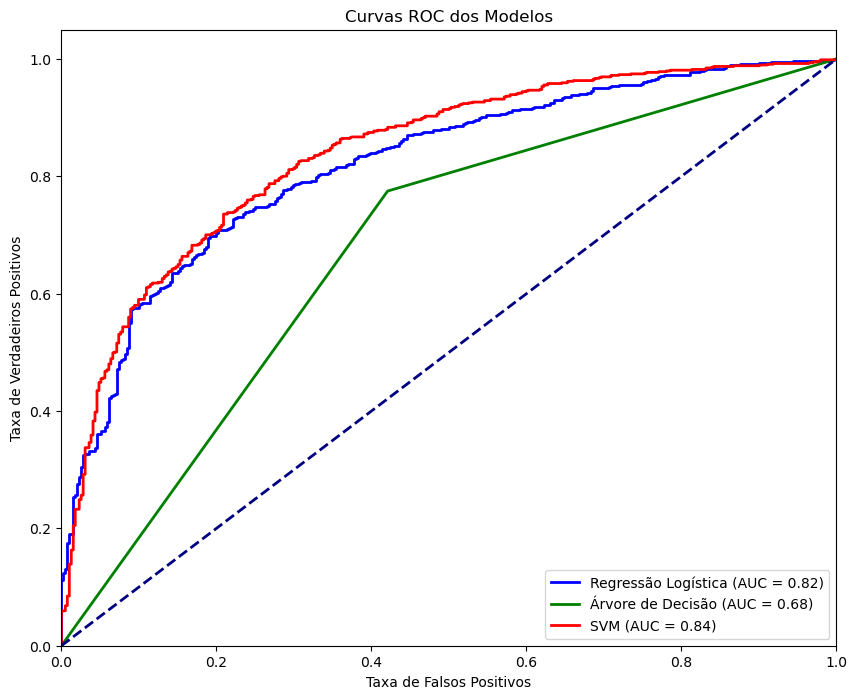

In [27]:
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, RocCurveDisplay, auc
import matplotlib.pyplot as plt

# Calcular as curvas ROC e AUC para cada modelo
modelos = [lr,dTree,svm_clf]
nomes_modelos = ['Regressão Logística', 'Árvore de Decisão', 'SVM']
cores = ['blue', 'green', 'red']

plt.figure(figsize=(10, 8))

for modelo, nome, cor in zip(modelos, nomes_modelos, cores):
    # Previsões de probabilidade para a classe positiva
    probas = modelo.predict_proba(X_test)[:, 1]
    # Calcular ROC
    fpr, tpr, thresholds = roc_curve(y_test, probas)
    # Calcular AUC
    roc_auc = auc(fpr, tpr)
    # Plotar a curva ROC
    plt.plot(fpr, tpr, color=cor, lw=2, label=f'{nome} (AUC = {roc_auc:.2f})')

# Adicionando detalhes ao gráfico
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curvas ROC dos Modelos')
plt.legend(loc="lower right")
plt.show()

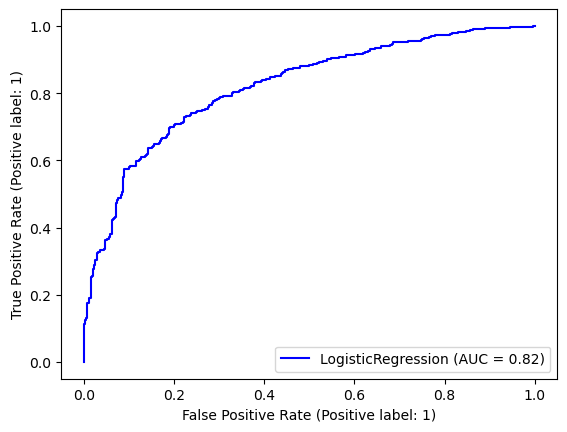

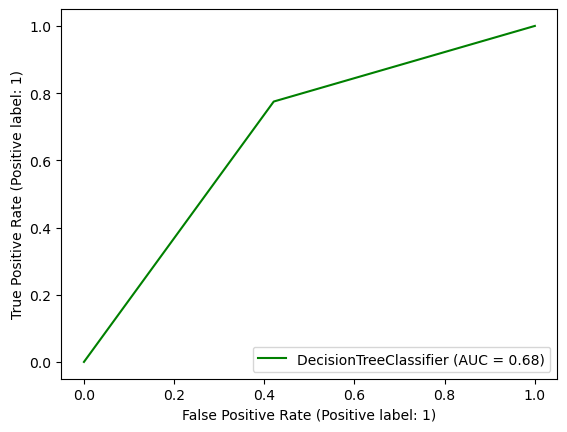

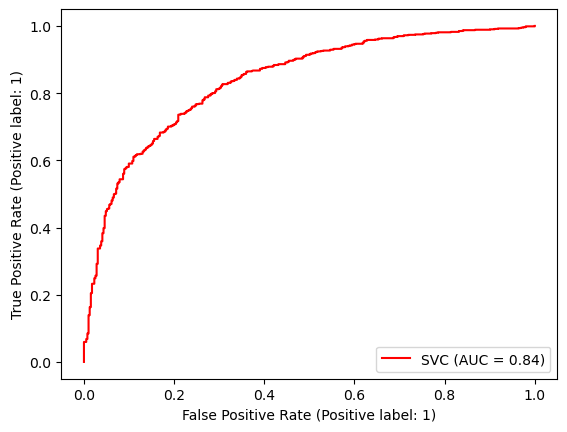

In [29]:
RocCurveDisplay.from_estimator(lr, X_test, y_test,c="b")
RocCurveDisplay.from_estimator(dTree, X_test, y_test, c="g")
RocCurveDisplay.from_estimator(svm_clf, X_test, y_test, c="r")
plt.show()

Utilizando a curva ROC, podemos verificar que o SVM foi o modelo que apresentou o melhor valor com 0.84 comparado com o modelo de arvore de decisão com 0.68 e o de regressão logistica com 0.82.

6. Com a escolha do melhor modelo, use os dados de vinho tinto, presentes na base original e faça a inferência (não é para treinar novamente!!!) para saber quantos vinhos são bons ou ruins. Utilize o mesmo critério utilizado com os vinhos brancos, para comparar o desempenho do modelo. Ele funciona da mesma forma para essa nova base? 
Justifique.

In [30]:
#aplicando o mesmo tratamento da base de dados para os vinhos tintos
df_red = df[df['type'] == 'red']
df_red['opinion'] = df_red['quality'].apply(lambda x: 0 if x <= 5 else 1)
df_red.drop(columns= 'quality', inplace= True)

C:\Users\Samsung\AppData\Local\Temp\ipykernel_2780\2621620315.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_red['opinion'] = df_red['quality'].apply(lambda x: 0 if x <= 5 else 1)
C:\Users\Samsung\AppData\Local\Temp\ipykernel_2780\2621620315.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_red.drop(columns= 'quality', inplace= True)


In [31]:
df_red = df_red.dropna(axis=0)
df_red = df_red.drop_duplicates()

In [32]:
X = df_red[['fixed acidity', 'volatile acidity', 'citric acid','residual sugar', 'chlorides', 'free sulfur dioxide','total sulfur dioxide', 'density', 'pH', 'sulphates','alcohol']]
y = df_red['opinion']

In [33]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

ypred = svm_clf.predict(X)

In [34]:
svm_clf.predict(scaler.transform(X))

print("Accuracy Test:",metrics.accuracy_score(y, ypred))
print("Precision Test:",metrics.precision_score(y,ypred))
print("Recall Test:",metrics.recall_score(y,ypred))
print("f1-score Test:",metrics.f1_score(y,ypred, average='weighted'))

C:\Users\Samsung\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Accuracy Test: 0.6681448632668144
Precision Test: 0.6557377049180327
Recall Test: 0.7832167832167832
f1-score Test: 0.6625597281061477


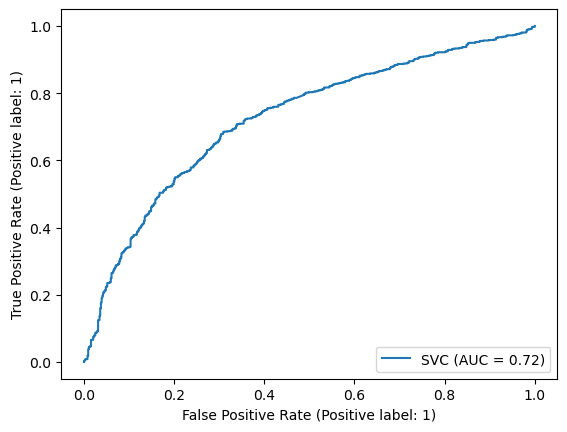

In [35]:
RocCurveDisplay.from_estimator(svm_clf, X, y)

Como podemos verificarcom os dados, o desempenho para a classificação da nova base de dados (vinhos tintos) não atinge a mesma eficácia. 
  
